In [50]:
# Import Libraries
import pandas as pd 
import numpy as np 

from sklearn.cluster import KMeans

#! pip install BeautifulSoup4
from bs4 import BeautifulSoup 
import requests  

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# use the inline backend to generate the plots within the browser
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors




#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library



Libraries imported.


In [3]:
url="https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods"
source = requests.get(url).text

soup = BeautifulSoup(source, 'lxml') 

In [4]:
table=soup.find('table', class_='wikitable sortable')

df_list = pd.read_html(str(table)) #list of dataframes
df=df_list[0] #Getting one & only dataframe from the list and assign into var df 
df.head()

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
0,Toronto CMA Average,NaN,All,5113149,5903.63,866,9.0,40704,10.6,11.4,NaN,NaN,NaN
1,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...",44577,12.45,3580,4.6,25750,11.1,5.9,Cantonese (19.3%),19.3% Cantonese,NaN
2,Alderwood,E,"0211.00, 0212.00",11656,4.94,2360,-4.0,35239,8.8,8.5,Polish (6.2%),06.2% Polish,NaN
3,Alexandra Park,OCoT,0039.00,4355,0.32,13609,0.0,19687,13.8,28.0,Cantonese (17.9%),17.9% Cantonese,NaN
4,Allenby,OCoT,0140.00,2513,0.58,4333,-1.0,245592,5.2,3.4,Russian (1.4%),01.4% Russian,NaN
5,Amesbury,NY,"0280.00, 0281.01, 0281.02",17318,3.51,4934,1.1,27546,16.4,19.7,Spanish (6.1%),06.1% Spanish,NaN
6,Armour Heights,NY,0298.00,4384,2.29,1914,2.0,116651,10.8,16.1,Russian (9.4%),09.4% Russian,NaN
7,Banbury,NY,0267.00,6641,2.72,2442,5.0,92319,6.1,4.8,Unspecified Chinese (5.1%),05.1% Unspecified Chinese,NaN
8,Bathurst Manor,NY,"0297.01, 0310.01, 0310.02",14945,4.69,3187,12.3,34169,13.4,18.6,Russian (9.5%),09.5% Russian,NaN
9,Bay Street Corridor,OCoT,0062.01,4787,0.11,43518,3.0,40598,17.1,49.3,Mandarin (9.6%),09.6% Mandarin,NaN


In [6]:
df = df[df["Name"] != 'Toronto CMA Average']
df = df.drop(columns=['FM','Census Tracts','% Change in Population since 2001','Transit Commuting %','% Renters','Second most common language (after English) by percentage','Map'])

In [7]:
#Rename column names 
df = df.rename(columns = {
    "Name":"Neighbourhood",
    "Land area (km2)":"Land Area",
    "Density (people/km2)":"Density",
    "Second most common language (after English) by name":"2nd Language"
})

In [10]:
df.sort_values(by=['Population'], ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)

In [11]:
df_top15=df[df.index<15]

In [12]:
df_top15

,Neighbourhood,Population,Land Area,Density,Average Income,2nd Language
0,Old East York,52220,7.94,6577,33172,Greek (4.3%)
1,Woburn,48507,13.34,3636,26190,Gujarati (9.1%)
2,Elia (Jane and Finch),48003,7.66,6267,22691,Vietnamese (6.9%)
3,L'Amoreaux,45862,7.15,6414,26375,Unspecified Chinese (13.9%)
4,Agincourt,44577,12.45,3580,25750,Cantonese (19.3%)
5,Malvern,44324,8.86,5003,25677,Tamil (12.2%)
6,Willowdale,43144,7.68,5618,39895,Cantonese (7.9%)
7,Downsview,36613,16.13,2270,26751,Italian (11.7%)
8,Newtonbrook,36046,8.77,4110,33428,Russian (8.8%)
9,Smithfield,34996,6.45,5426,24387,Punjabi (11.8%)


Let's get the coordinates

In [13]:
# define the dataframe columns
column_names = ['Neighbourhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
coordinates = pd.DataFrame(columns=column_names)

In [14]:
for neighbourhood in df_top15['Neighbourhood']:
    geolocator = Nominatim(user_agent="tor_explorer")
    location = geolocator.geocode('{}, Toronto, Ontario'.format(neighbourhood))
    latitude = location.latitude
    longitude = location.longitude

    
    coordinates = coordinates.append({'Neighbourhood': neighbourhood,
                                      'Latitude': latitude,
                                      'Longitude': longitude}, ignore_index=True)

In [15]:
coordinates

,Neighbourhood,Latitude,Longitude
0,Old East York,43.699971,-79.332520
1,Woburn,43.759824,-79.225291
2,Elia (Jane and Finch),43.757253,-79.517697
3,L'Amoreaux,43.799003,-79.305967
4,Agincourt,43.785353,-79.278549
5,Malvern,43.809196,-79.221701
6,Willowdale,43.761510,-79.410923
7,Downsview,43.749299,-79.462248
8,Newtonbrook,43.793886,-79.425679
9,Smithfield,43.631184,-79.485667


In [16]:
#Merge two datasets using Neighbourhood
df_cord = pd.merge(df_top15, coordinates, on='Neighbourhood')

In [17]:
df_cord

,Neighbourhood,Population,Land Area,Density,Average Income,2nd Language,Latitude,Longitude
0,Old East York,52220,7.94,6577,33172,Greek (4.3%),43.699971,-79.332520
1,Woburn,48507,13.34,3636,26190,Gujarati (9.1%),43.759824,-79.225291
2,Elia (Jane and Finch),48003,7.66,6267,22691,Vietnamese (6.9%),43.757253,-79.517697
3,L'Amoreaux,45862,7.15,6414,26375,Unspecified Chinese (13.9%),43.799003,-79.305967
4,Agincourt,44577,12.45,3580,25750,Cantonese (19.3%),43.785353,-79.278549
5,Malvern,44324,8.86,5003,25677,Tamil (12.2%),43.809196,-79.221701
6,Willowdale,43144,7.68,5618,39895,Cantonese (7.9%),43.761510,-79.410923
7,Downsview,36613,16.13,2270,26751,Italian (11.7%),43.749299,-79.462248
8,Newtonbrook,36046,8.77,4110,33428,Russian (8.8%),43.793886,-79.425679
9,Smithfield,34996,6.45,5426,24387,Punjabi (11.8%),43.631184,-79.485667


#### Display the top 15 populated neighbourhoods in a barchart

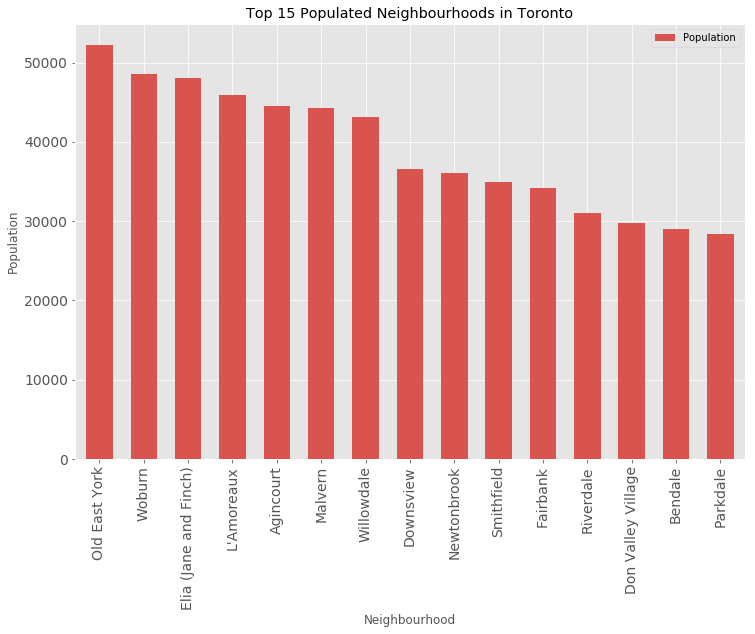

In [18]:
pop_chart = df_top15[['Neighbourhood', 'Population']].copy()
top_chart = pop_chart.head(15)
top_chart.set_index('Neighbourhood', inplace=True)

# plot data
colors = '#FF0000'
top_chart.plot(kind='bar', figsize=(12, 8), width=0.6, fontsize=14, color=colors)

plt.xlabel('Neighbourhood') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('Top 15 Populated Neighbourhoods in Toronto') # add title to the plot

plt.show()

### Segmenting and clustering in Toronto

Get the latitude and longitude values of Toronto.

In [19]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [20]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood in zip(df_cord['Latitude'], df_cord['Longitude'], df_cord['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Explore the first neighbourhood in the dataframe.

#### Adopting the Foursquare API to find out the venue category

In [23]:
df_cord.loc[0, 'Neighbourhood']

'Old East York'

In [24]:
neighbourhood_latitude = df_cord.loc[0, 'Latitude'] # neighbourhood latitude value
neighbourhood_longitude = df_cord.loc[0, 'Longitude'] # neighbourhood longitude value

neighbourhood_name = df_cord.loc[0, 'Neighbourhood'] # neighbourhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Old East York are 43.699971000000005, -79.33251996261595.


### Explore the top 100 venues from Foursquare API of radius of 500M

In [25]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

CLIENT_ID = "4CMFZLZIHAXLUYSDP0JACWTBKBJE3JTTSL0KZWYKQIZU3JTL"


# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)
#url # display URL

In [26]:
results = requests.get(url).json()
#results

In [27]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [28]:
# clean the json and structure it into a pandas dataframe.
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Mon K Patisserie,Pastry Shop,43.696922,-79.329520
1,LCBO,Liquor Store,43.696728,-79.328875
2,Remarks Bar & Grill,Pub,43.696726,-79.329219
3,Pizza Hut,Pizza Place,43.696383,-79.328778
4,Taylor Creek Park - West,Park,43.701260,-79.331726


In [29]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

7 venues were returned by Foursquare.


In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Get nearby venues for Toronto neighbourhoods

In [31]:
toronto_venues = getNearbyVenues(names=df_cord['Neighbourhood'],
                                   latitudes=df_cord['Latitude'],
                                   longitudes=df_cord['Longitude']
                                  )

Old East York
Woburn
Elia (Jane and Finch)
L'Amoreaux
Agincourt
Malvern
Willowdale
Downsview
Newtonbrook
Smithfield
Fairbank
Riverdale
Don Valley Village
Bendale
Parkdale


- Let's check the size of the resulting dataframe

In [32]:
print(toronto_venues.shape)
toronto_venues.head()

(303, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Old East York,43.699971,-79.33252,Mon K Patisserie,43.696922,-79.329520,Pastry Shop
1,Old East York,43.699971,-79.33252,LCBO,43.696728,-79.328875,Liquor Store
2,Old East York,43.699971,-79.33252,Remarks Bar & Grill,43.696726,-79.329219,Pub
3,Old East York,43.699971,-79.33252,Pizza Hut,43.696383,-79.328778,Pizza Place
4,Old East York,43.699971,-79.33252,Taylor Creek Park - West,43.701260,-79.331726,Park


#### Let's check how many venues were returned for each neighbourhood

In [33]:
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt,14,14,14,14,14,14
Bendale,6,6,6,6,6,6
Don Valley Village,13,13,13,13,13,13
Downsview,10,10,10,10,10,10
Elia (Jane and Finch),22,22,22,22,22,22
Fairbank,9,9,9,9,9,9
L'Amoreaux,4,4,4,4,4,4
Malvern,13,13,13,13,13,13
Newtonbrook,37,37,37,37,37,37


Let's find out how many unique categories can be curated from all the returned venues

In [34]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 102 uniques categories.


### Analyze Each Neighbourhood

In [35]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Accessories Store,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Bakery,Bank,Bar,Baseball Field,Beach Bar,Beer Store,Big Box Store,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Butcher,Café,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Chiropractor,Chocolate Shop,Coffee Shop,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Hawaiian Restaurant,Hong Kong Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Light Rail Station,Liquor Store,Luggage Store,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Neighborhood,North Indian Restaurant,Optical Shop,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pastry Shop,Pet Store,Pharmacy,Pizza Place,Poke Place,Pub,Ramen Restaurant,Restaurant,Sandwich Place,Shopping Mall,Skating Rink,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoga Studio
0,Old East York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Old East York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Old East York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Old East York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Old East York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
toronto_onehot.shape

(303, 103)

#### Group the rows together based on the mean of the frequency of occurrence of each category

In [37]:
# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped.head(10)

,Neighbourhood,Accessories Store,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Bakery,Bank,Bar,Baseball Field,Beach Bar,Beer Store,Big Box Store,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Butcher,Café,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Chiropractor,Chocolate Shop,Coffee Shop,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Hawaiian Restaurant,Hong Kong Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Light Rail Station,Liquor Store,Luggage Store,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Neighborhood,North Indian Restaurant,Optical Shop,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pastry Shop,Pet Store,Pharmacy,Pizza Place,Poke Place,Pub,Ramen Restaurant,Restaurant,Sandwich Place,Shopping Mall,Skating Rink,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.071429,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.071429,0.000000,0.071429,0.000000,0.285714,0.0,0.0,0.071429,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.071429,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.071429,0.0,0.0,0.0,0.000000,0.000000,0.0,0.071429,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.071429,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.071429,0.0
1,Bendale,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.166667,0.166667,0.0,0.0,0.0,0.000000,0.0,0.166667,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.166667,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.166667,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,Don Valley Village,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.153846,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.076923,0.0,0.0,0.153846,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.076923,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.076923,0.000000,0.000000,0.076923,0.076923,0.0,0.000000,0.0,0.000000,0.230769,0.000000,0.000000,0.0,0.076923,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,Downsview,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.200000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.1,0.000000,0.0,0.100000,0.0,0.000000,0.0,0.100000,0.1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.1,0.0,0.000000,

In [38]:
toronto_grouped.shape

(15, 103)

#### Find out the top 10 most common venues in the neighbourhood

In [39]:
# sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Asian Restaurant,Coffee Shop,Butcher,Korean Restaurant,Hong Kong Restaurant,Cantonese Restaurant,Shopping Mall,Vietnamese Restaurant,Food Court
1,Bendale,Dog Run,Grocery Store,Fast Food Restaurant,Tennis Court,Optical Shop,Discount Store,Yoga Studio,Chiropractor,Chocolate Shop,Coffee Shop
2,Don Valley Village,Sandwich Place,Bank,Coffee Shop,Park,Pharmacy,Pizza Place,Sushi Restaurant,Chinese Restaurant,Grocery Store,Farmers Market
3,Downsview,Coffee Shop,French Restaurant,Gas Station,Outdoor Supply Store,Park,Gym / Fitness Center,Gym Pool,Men's Store,Bus Station,Discount Store
4,Elia (Jane and Finch),Grocery Store,Fast Food Restaurant,Pizza Place,Discount Store,Shopping Mall,Sandwich Place,Beer Store,Caribbean Restaurant,Coffee Shop,Liquor Store
5,Fairbank,Coffee Shop,Grocery Store,Food Truck,Park,Bakery,Bank,Pharmacy,Discount Store,Japanese Restaurant,Yoga Studio
6,L'Amoreaux,Shopping Mall,Coffee Shop,Athletics & Sports,Chinese Restaurant,Yoga Studio,Chocolate Shop,Convenience Store,Deli / Bodega,Department Store,Dessert Shop
7,Malvern,Fast Food Restaurant,Pizza Place,Pharmacy,Sandwich Place,Skating Rink,Bubble Tea Shop,Park,Convenience Store,Gym / Fitness Center,Grocery Store
8,Newtonbrook,Korean Restaurant,Coffee Shop,Middle Eastern Restaurant,Restaurant,Hardware Store,Vietnamese Restaurant,Discount Store,Fast Food Restaurant,Café,Cantonese Restaurant
9,Old East York,Park,Pastry Shop,Liquor Store,Pizza Place,Pub,Restaurant,Yoga Studio,Dessert Shop,Chiropractor,Chocolate Shop


#### Cluster the neighbourhoods using K-Means Clustering

In [41]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([3, 0, 1, 1, 1, 1, 4, 1, 1, 2, 1, 3, 1, 1, 1], dtype=int32)

In [42]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [43]:
toronto_merged = pd.merge(df_cord, neighborhoods_venues_sorted, on='Neighbourhood')
toronto_merged

,Neighbourhood,Population,Land Area,Density,Average Income,2nd Language,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Old East York,52220,7.94,6577,33172,Greek (4.3%),43.699971,-79.332520,2,Park,Pastry Shop,Liquor Store,Pizza Place,Pub,Restaurant,Yoga Studio,Dessert Shop,Chiropractor,Chocolate Shop
1,Woburn,48507,13.34,3636,26190,Gujarati (9.1%),43.759824,-79.225291,1,Fast Food Restaurant,Coffee Shop,Discount Store,Bank,Beer Store,Hardware Store,Department Store,Paper / Office Supplies Store,Pharmacy,Pizza Place
2,Elia (Jane and Finch),48003,7.66,6267,22691,Vietnamese (6.9%),43.757253,-79.517697,1,Grocery Store,Fast Food Restaurant,Pizza Place,Discount Store,Shopping Mall,Sandwich Place,Beer Store,Caribbean Restaurant,Coffee Shop,Liquor Store
3,L'Amoreaux,45862,7.15,6414,26375,Unspecified Chinese (13.9%),43.799003,-79.305967,4,Shopping Mall,Coffee Shop,Athletics & Sports,Chinese Restaurant,Yoga Studio,Chocolate Shop,Convenience Store,Deli / Bodega,Department Store,Dessert Shop
4,Agincourt,44577,12.45,3580,25750,Cantonese (19.3%),43.785353,-79.278549,3,Chinese Restaurant,Asian Restaurant,Coffee Shop,Butcher,Korean Restaurant,Hong Kong Restaurant,Cantonese Restaurant,Shopping Mall,Vietnamese Restaurant,Food Court
5,Malvern,44324,8.86,5003,25677,Tamil (12.2%),43.809196,-79.221701,1,Fast Food Restaurant,Pizza Place,Pharmacy,Sandwich Place,Skating Rink,Bubble Tea Shop,Park,Convenience Store,Gym / Fitness Center,Grocery Store
6,Willowdale,43144,7.68,5618,39895,Cantonese (7.9%),43.761510,-79.410923,1,Coffee Shop,Grocery Store,Japanese Restaurant,Burger Joint,Sandwich Place,Fried Chicken Joint,Gas Station,Korean Restaurant,Pharmacy,Restaurant
7,Downsview,36613,16.13,2270,26751,Italian (11.7%),43.749299,-79.462248,1,Coffee Shop,French Restaurant,Gas Station,Outdoor Supply Store,Park,Gym / Fitness Center,Gym Pool,Men's Store,Bus Station,Discount Store
8,Newtonbrook,36046,8.77,4110,33428,Russian (8.8%),43.793886,-79.425679,1,Korean Restaurant,Coffee Shop,Middle Eastern Restaurant,Restaurant,Hardware Store,Vietnamese Restaurant,Discount Store,Fast Food Restaurant,Café,Cantonese Restaurant
9,Smithfield,34996,6.45,5426,24387,Punjabi (11.8%),43.631184,-79.485667,1,Coffee Shop,Bank,Sandwich Place,Pharmacy,Pet Store,Italian Restaurant,Juice Bar,Chinese Restaurant,Liquor Store,Sushi Restaurant


#### Finally, let's visualize the resulting clusters

In [51]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

In [132]:
# Cluster 1 
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[0] + [1] + list(range(5, toronto_merged.shape[1]))]].sort_values('Population', ascending=False).head(5)

,Neighbourhood,Population,2nd Language,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Bendale,28945,Tamil (3.7%),43.75352,-79.255336,0,Dog Run,Grocery Store,Fast Food Restaurant,Tennis Court,Optical Shop,Discount Store,Yoga Studio,Chiropractor,Chocolate Shop,Coffee Shop


In [135]:
# Cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[0] + [1] + list(range(5, toronto_merged.shape[1]))]].sort_values('Population', ascending=False).head(5)

,Neighbourhood,Population,2nd Language,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Woburn,48507,Gujarati (9.1%),43.759824,-79.225291,1,Fast Food Restaurant,Coffee Shop,Discount Store,Bank,Beer Store,Hardware Store,Department Store,Paper / Office Supplies Store,Pharmacy,Pizza Place
2,Elia (Jane and Finch),48003,Vietnamese (6.9%),43.757253,-79.517697,1,Grocery Store,Fast Food Restaurant,Pizza Place,Discount Store,Shopping Mall,Sandwich Place,Beer Store,Caribbean Restaurant,Coffee Shop,Liquor Store
5,Malvern,44324,Tamil (12.2%),43.809196,-79.221701,1,Fast Food Restaurant,Pizza Place,Pharmacy,Sandwich Place,Skating Rink,Bubble Tea Shop,Park,Convenience Store,Gym / Fitness Center,Grocery Store
6,Willowdale,43144,Cantonese (7.9%),43.761510,-79.410923,1,Coffee Shop,Grocery Store,Japanese Restaurant,Burger Joint,Sandwich Place,Fried Chicken Joint,Gas Station,Korean Restaurant,Pharmacy,Restaurant
7,Downsview,36613,Italian (11.7%),43.749299,-79.462248,1,Coffee Shop,French Restaurant,Gas Station,Outdoor Supply Store,Park,Gym / Fitness Center,Gym Pool,Men's Store,Bus Station,Discount Store


In [46]:
# Cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[0] + [1] + list(range(5, toronto_merged.shape[1]))]].sort_values('Population', ascending=False).head(5)

,Neighbourhood,Population,2nd Language,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Old East York,52220,Greek (4.3%),43.699971,-79.33252,2,Park,Pastry Shop,Liquor Store,Pizza Place,Pub,Restaurant,Yoga Studio,Dessert Shop,Chiropractor,Chocolate Shop


In [47]:
# Cluster 4
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[0] + [1] + list(range(5, toronto_merged.shape[1]))]].sort_values('Population', ascending=False).head(5)

,Neighbourhood,Population,2nd Language,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Agincourt,44577,Cantonese (19.3%),43.785353,-79.278549,3,Chinese Restaurant,Asian Restaurant,Coffee Shop,Butcher,Korean Restaurant,Hong Kong Restaurant,Cantonese Restaurant,Shopping Mall,Vietnamese Restaurant,Food Court
11,Riverdale,31007,Cantonese (6.7%),43.665470,-79.352594,3,Vietnamese Restaurant,Chinese Restaurant,Bakery,Coffee Shop,Grocery Store,Fast Food Restaurant,Trail,Asian Restaurant,Fish Market,Chocolate Shop


In [48]:
# Cluster 5
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[0] + [1] + list(range(5, toronto_merged.shape[1]))]].sort_values('Population', ascending=False).head(5)

,Neighbourhood,Population,2nd Language,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,L'Amoreaux,45862,Unspecified Chinese (13.9%),43.799003,-79.305967,4,Shopping Mall,Coffee Shop,Athletics & Sports,Chinese Restaurant,Yoga Studio,Chocolate Shop,Convenience Store,Deli / Bodega,Department Store,Dessert Shop


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

## Final Analysis

Based on above results from top 15 populated neighbourhoods, the second cluster (i.e.cluster label=1) has a higher number of neighbourhoods with similar characteristics compare to other clusters. 

Within the second cluster, we would like to recommend a neighbourhood with high demand for Fast Food. As you can see there are two neighbourhoods with Fast Food Restaurant as their 1st Most Common Venue namely *Woburn* and *Malvern*. Note that the neighbourhood **Woburn** looks to be **the best choice** as it is the most populated (i.e.48507) in the second cluster.

Another point to highlight is that the 2nd Language of Woburn is Gujarati. We can think that there is a higher number of Gujarati people in that neighbourhood. So that it would be better to concern about Gujarati Fast Foods to attract more customers. Since Woburn and Malvern are nearby neighbourhoods, we will also encourage to offer South-Indian fast food. (because the 2nd Language of Malvern is Tamil)

With all these information, we can conclude our recommendation as follows,

- Region: 2nd Cluster
- Best Neighbourhood: Woburn
- Target customers: Mainly for Gujarati people
- Additional considerations: Indian Fast Food (Mainly Gujarati food and South-Indian food) 

